<a href="https://colab.research.google.com/github/Asfilcnx3/Project1_Iris/blob/main/Iris_Project_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In our first project we will work with the iris dataset using pytorch for the data classification using a simple NN

In [1]:
### Import the librarys
import torch
import torch.nn as nn # Import the nn module that contains the building blocks
import torch.optim as optim # Import the optimization module that contains optimizers such as "Adam", "SGD"
import torch.nn.functional as F # Import the module that contains the activation functions

from sklearn.datasets import load_iris # Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # We need to scale the data for the Linear Regression
from sklearn.metrics import accuracy_score, confusion_matrix # Precission measurements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
------------------------------
target
0    50
1    50
2    50
Name: count, dtype: int64
------------------------------


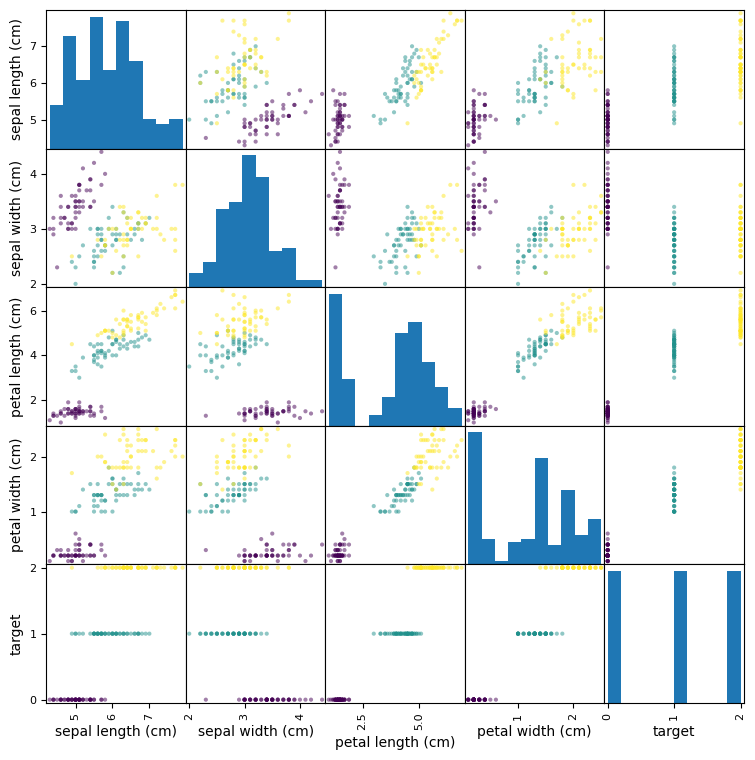

In [2]:
# Load and explore the dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
print(df.head())
print("---" * 10)

# Visual exploration to found the relations between the data
print(df.target.value_counts())
print("---" * 10)

pd.plotting.scatter_matrix(df, c=df["target"], figsize=(9,9))
plt.show()

In [3]:
# Create X and y
X = df.drop("target", axis=1)
y = df["target"]

# Scale the data (Linear Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.dtype

# Do the train-test split (without valid data)
X_train, X_test, y_train, y_test  = train_test_split(
    X_scaled,
    y,
    stratify=y,
    test_size=0.2,
    random_state=42
)

# Check the shape of the train and test data
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)
print("---" * 10)

# Convert into tensor to work with the data
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Check the shape of the tensors
print(X_train_tensor.shape)
print(y_train_tensor.shape)
print(X_test_tensor.shape)
print(y_test_tensor.shape)
print("---" * 10)

(120, 4)
(30, 4)
(30,)
(120,)
------------------------------
torch.Size([120, 4])
torch.Size([120])
torch.Size([30, 4])
torch.Size([30])
------------------------------


Epoch [10/100] - Loss: 0.9539
Epoch [20/100] - Loss: 0.6831
Epoch [30/100] - Loss: 0.4099
Epoch [40/100] - Loss: 0.2793
Epoch [50/100] - Loss: 0.1962
Epoch [60/100] - Loss: 0.1335
Epoch [70/100] - Loss: 0.0852
Epoch [80/100] - Loss: 0.0594
Epoch [90/100] - Loss: 0.0471
Epoch [100/100] - Loss: 0.0414
------------------------------

 Precisión en test: 96.67%
------------------------------


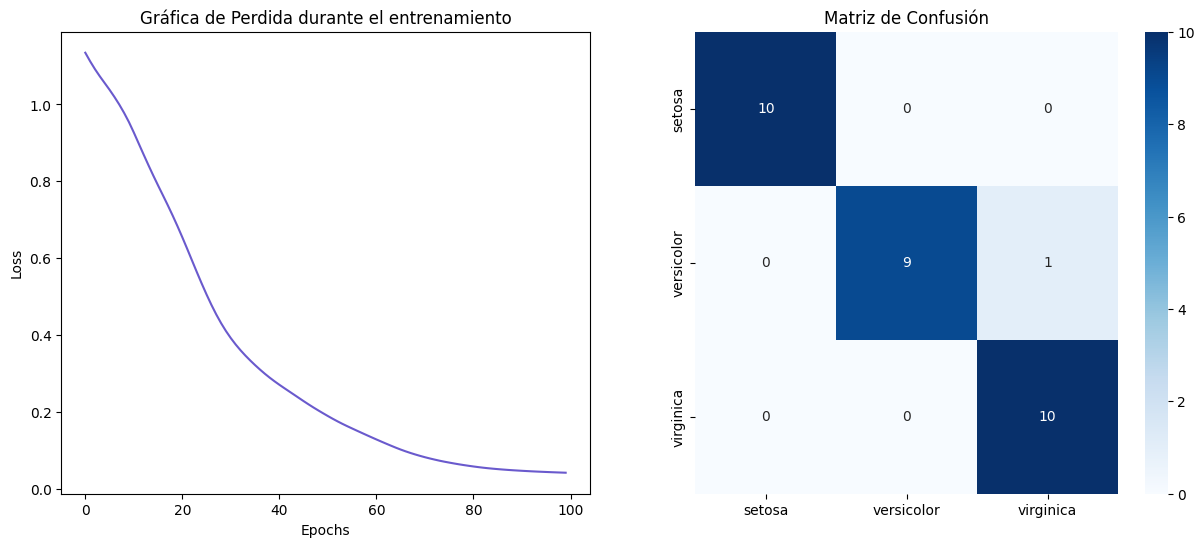

In [5]:
# Create our first Neural Network "Fully-Conected" (Basic)

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(4, 16)  # 4 Input Features -> 16 Neurons
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 3)   # 3 output classes

    def forward(self, x):
        x = F.relu(self.fc1(x))  #  ReLU activation
        x = F.relu(self.fc2(x))
        x = self.fc3(x)          # No softmax (CrossEntropyLoss do it)
        return x

# Create the model
model = SimpleNN()

# Create the loss function
criterion = nn.CrossEntropyLoss()

# Create the optimizator
optimizer = optim.Adam(model.parameters(), lr=0.01)



### We start the training loop
epochs = 100
losses = []

for epoch in range(epochs):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}] - Loss: {loss.item():.4f}")


# Evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, predicted = torch.max(test_outputs, 1)
    acc = accuracy_score(y_test_tensor.numpy(), predicted.numpy())
    print("---" * 10)
    print(f"\n Accuracy on test: {acc*100:.2f}%")
    print("---" * 10)


fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].plot(losses, color="slateblue")
ax[0].set_title("Loss Graph")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

cm = confusion_matrix(y_test_tensor.numpy(), predicted.numpy())
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names, ax=ax[1])
ax[1].set_title("Confussion Matrix")

plt.show()